# Issues with low cost HOSVD (Soledad's version)

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import tensorly as tl
import time
import kagglehub
import json
from tqdm import tqdm
import os

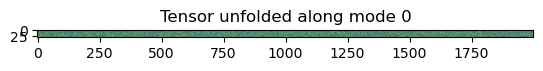

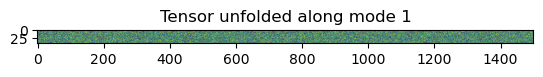

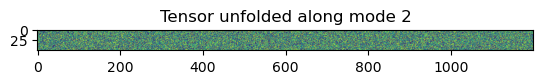

<Figure size 640x480 with 0 Axes>

In [77]:
path_figs = "./FULL_EXPLANATION"
tensor = np.random.rand(30,40,50)
for i in range(tensor.ndim):
    plt.title(f"Tensor unfolded along mode {i}")
    plt.imshow(tl.unfold(tensor=tensor, mode=i))
    sampled_indices = np.arange(0, tensor.shape[2], 2)  # [0, 2, 4, ..., 48]

    plt.figure()

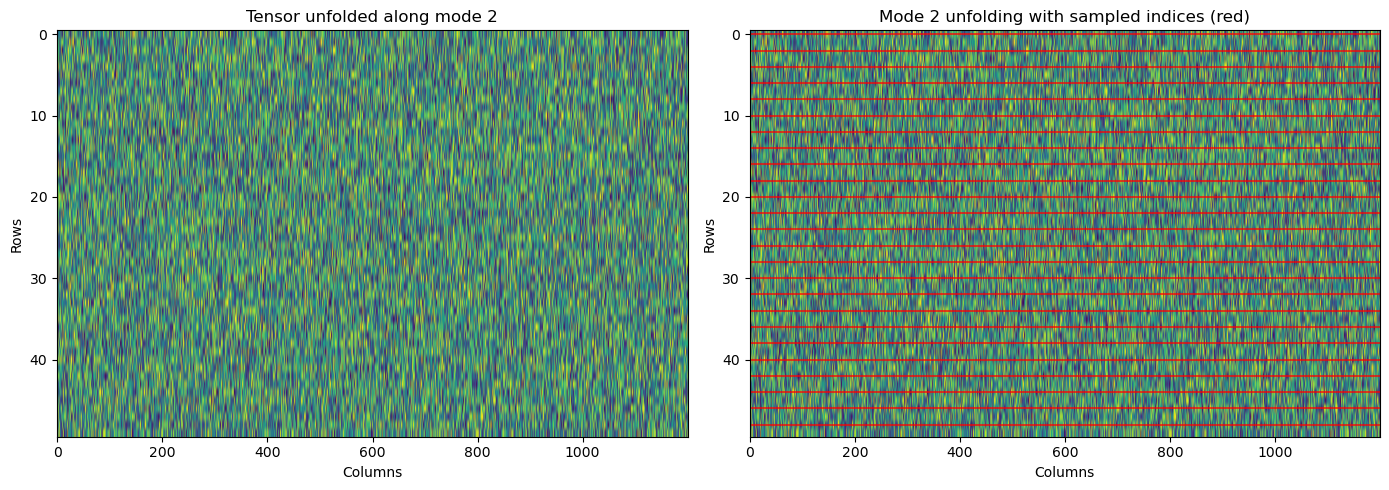

In [78]:
path_figs = "./FULL_EXPLANATION"
tensor = np.random.rand(30, 40, 50)

# Subsample every second point in the last dimension (dimension 2)
sampled_indices = np.arange(0, tensor.shape[2], 2)  # [0, 2, 4, ..., 48]

# Create subplots: 1 row x 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Mode 2 unfolding
unfolded = tl.unfold(tensor=tensor, mode=2)

# Left: regular unfolding
axes[0].set_title(f"Tensor unfolded along mode 2")
axes[0].imshow(unfolded, aspect='auto')
axes[0].set_xlabel('Columns')
axes[0].set_ylabel('Rows')

# Right: unfolding with horizontal red lines
axes[1].set_title(f"Mode 2 unfolding with sampled indices (red)")
axes[1].imshow(unfolded, aspect='auto')
for idx in sampled_indices:
    axes[1].axhline(y=idx, color='red', linewidth=1.5, alpha=0.7)
axes[1].set_xlabel('Columns')
axes[1].set_ylabel('Rows')

plt.tight_layout()
plt.savefig(f'{path_figs}/mode2_unfolding_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

In [79]:
"""
reynolds_numbers = [8000]
paths = [f"sharmapushan/hydrogen-jet-{re}" for re in reynolds_numbers]
data_paths = [kagglehub.dataset_download(name) for name in paths]
#this part of the code is taken from multiple RE analysis
data_path = data_paths[0]
with open(data_paths[0] + '/info.json') as f:
    metadata = json.load(f)
# variable definition
subsample_x, subsample_y = 10,10
Nx, Ny = metadata['global']['Nxyz']
n_snapshots = metadata['global']['snapshots'] - 1
Nx_sub = Nx // subsample_x
Ny_sub = Ny // subsample_y

component_names = ['YH', 'YH2', 'YO', 'YO2', 'YOH', 'YH2O', 'YHO2', 'YH2O2']
species_names = [cname[1:] for cname in component_names]
n_species = len(component_names)
molar_masses = {'YH': 1.0, 'YH2': 2.0, 'YO': 8.0, 'YO2': 16.0, 'YOH': 9.0, 'YH2O': 10.0, 'YHO2': 17.0, 'YH2O2': 18.0}
file_key_map = file_key_map = {'YH': 'YH filename', 'YH2': 'YH2 filename', 'YO': 'YO filename', 'YO2': 'YO2 filename',
                                'YOH': 'YOH filename', 'YH2O': 'YH2O filename', 'YHO2': 'YHO2 filename', 'YH2O2': 'YH2O2 filename'
}

Lx, Ly = 12.5, 15.6# domain size in D units

print(f"Grid: {Nx}x{Ny}, Subsampled: {Nx_sub}x{Ny_sub}")

tensor_ = np.zeros((Ny_sub, Nx_sub, n_species, n_snapshots))

for t_idx in tqdm(range(n_snapshots)):
    for new_idx, (comp_name, orig_idx) in enumerate(zip(component_names, range(n_species))):
        filename_key = file_key_map[comp_name]
        filename = metadata['local'][t_idx][filename_key]
        data = np.fromfile(f"{data_path}/{filename}", dtype='<f4').reshape(Ny, Nx)
        molar_data = data / molar_masses[comp_name]
        tensor_[:, :, new_idx, t_idx] = molar_data[::subsample_x, ::subsample_y]
    
print(tensor.shape)
print("Data loading complete!")
tensor = tensor_[:, :, 4, :]
"""

'\nreynolds_numbers = [8000]\npaths = [f"sharmapushan/hydrogen-jet-{re}" for re in reynolds_numbers]\ndata_paths = [kagglehub.dataset_download(name) for name in paths]\n#this part of the code is taken from multiple RE analysis\ndata_path = data_paths[0]\nwith open(data_paths[0] + \'/info.json\') as f:\n    metadata = json.load(f)\n# variable definition\nsubsample_x, subsample_y = 10,10\nNx, Ny = metadata[\'global\'][\'Nxyz\']\nn_snapshots = metadata[\'global\'][\'snapshots\'] - 1\nNx_sub = Nx // subsample_x\nNy_sub = Ny // subsample_y\n\ncomponent_names = [\'YH\', \'YH2\', \'YO\', \'YO2\', \'YOH\', \'YH2O\', \'YHO2\', \'YH2O2\']\nspecies_names = [cname[1:] for cname in component_names]\nn_species = len(component_names)\nmolar_masses = {\'YH\': 1.0, \'YH2\': 2.0, \'YO\': 8.0, \'YO2\': 16.0, \'YOH\': 9.0, \'YH2O\': 10.0, \'YHO2\': 17.0, \'YH2O2\': 18.0}\nfile_key_map = file_key_map = {\'YH\': \'YH filename\', \'YH2\': \'YH2 filename\', \'YO\': \'YO filename\', \'YO2\': \'YO2 filename\',\

# Subsampled HOSVD

(30, 160)
(40, 120)
(50, 96)
0.0253448486328125
True


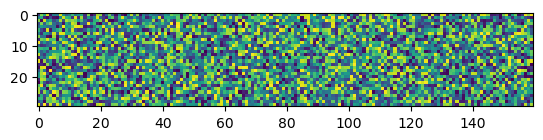

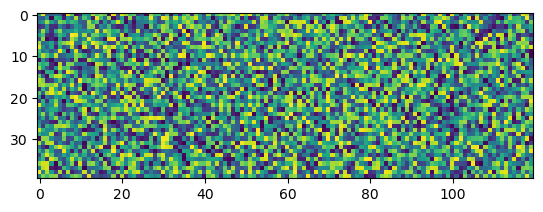

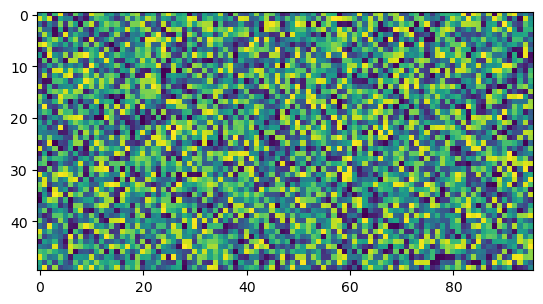

<Figure size 640x480 with 0 Axes>

In [80]:
sampling_ratio = 0.08
t_start = time.time()
factors = []
for mode in range(tensor.ndim):
    unfolded = tl.unfold(tensor, mode)
    m, n = unfolded.shape
    n_samples = int(n * sampling_ratio)        
    sample_indices = np.random.choice(n, size=n_samples, replace=False)
    sampled_matrix = unfolded[:, sample_indices]
    plt.imshow(sampled_matrix)
    plt.figure()
    print(sampled_matrix.shape)
    U, _, _ = np.linalg.svd(sampled_matrix, full_matrices=False)    
    factors.append(U)
core = tl.tenalg.multi_mode_dot(tensor, [U.T for U in factors], modes = [mode for mode in range(tensor.ndim)])
t_end = time.time()
print(t_end - t_start)

reconst = tl.tenalg.multi_mode_dot(core, factors, modes = [mode for mode in range(tensor.ndim)])
print(np.allclose(tensor, reconst))

# Low Cost HOSVD

This is without sign fixing and labor reorthogonalization, still the main idea is the same

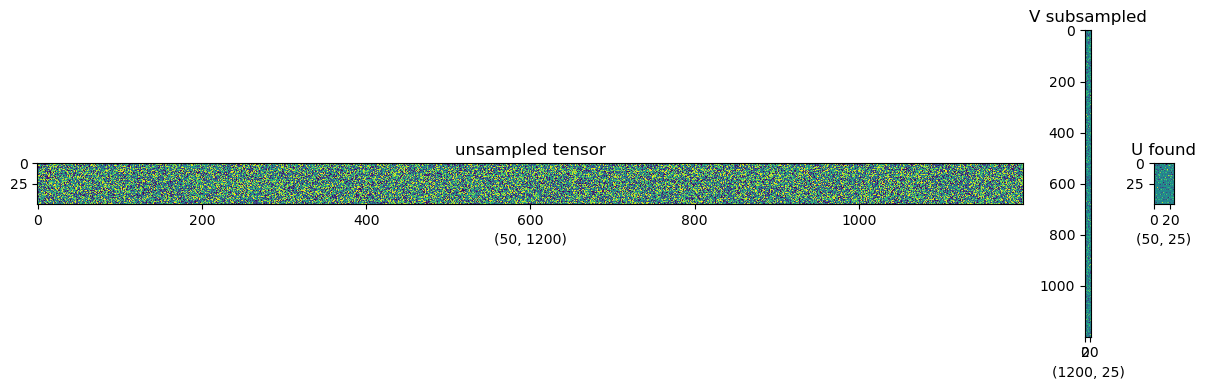

Time: 0.3404660224914551
False


In [81]:
t_start = time.time()
subsampled_tensor = tensor[:, :, ::2]
factors_lc = []

for mode in range(tensor.ndim):
    unfolded = tl.unfold(subsampled_tensor, mode)
    
    if mode != tensor.ndim - 1:
        U, _, _ = np.linalg.svd(unfolded, full_matrices=False)    
    else:
        U_red, sigma, V_red = np.linalg.svd(unfolded, full_matrices=False)        
        Q, R = np.linalg.qr(U_red)
        U_red = U_red @ np.linalg.inv(R)
        Q, R = np.linalg.qr(V_red.T)
        V_red = (V_red.T @ np.linalg.inv(R)).T
        ss = U_red.T @ unfolded @ V_red.T
        ss_sign = np.sign(np.diag(ss))
        V_red = V_red.T @ np.diag(ss_sign)
        V_red = V_red.T
        non_sampled_unfolded = tl.unfold(tensor, mode)
        U = non_sampled_unfolded @ V_red.T @ np.diag(1/sigma)
        Q, _ = np.linalg.qr(U)
        U = Q
        matrices = [non_sampled_unfolded,V_red.T,  U]

        widths = [m.shape[1] for m in matrices]

        fig, ax = plt.subplots(
            1, 3,
            figsize=(12, 4),
            gridspec_kw={'width_ratios': widths}
        )

        titles = ["unsampled tensor","V subsampled",  "U found"]

        for a, M, title in zip(ax, matrices, titles):
            a.imshow(M, aspect='equal', interpolation='none')
            a.set_title(title)
            a.set_xlabel(str(M.shape))

        plt.tight_layout()
        plt.savefig(fname = path_figs + "/matrices_product.png")
    
        plt.show()
    factors_lc.append(U)
core = tl.tenalg.multi_mode_dot(tensor, [U.T for U in factors_lc],modes=[mode for mode in range(tensor.ndim)])
t_end = time.time()
print(f"Time: {t_end - t_start}")

reconst_lc = tl.tenalg.multi_mode_dot(core, factors_lc, modes=[mode for mode in range(tensor.ndim)])
print(np.allclose(tensor, reconst_lc))

# Performance Comparison: Tensor Size Sweep

Comparing computation times for Low Cost HOSVD vs Subsampled HOSVD as tensor dimensions increase

Running tensor size sweep...
------------------------------------------------------------

Size: 30x30x30 (Total elements: 27,000)
  Subsampled HOSVD: 0.0013s, Compression: 0.91x, Error: 1.55e-15
  Low Cost HOSVD:   0.0024s, Compression: 1.71x, Error: 3.45e-01
  Speedup (Sub/LC): 0.54x

Size: 40x40x40 (Total elements: 64,000)
  Subsampled HOSVD: 0.0015s, Compression: 0.93x, Error: 1.38e-15
  Low Cost HOSVD:   0.0039s, Compression: 1.78x, Error: 3.49e-01
  Speedup (Sub/LC): 0.39x

Size: 50x50x50 (Total elements: 125,000)
  Subsampled HOSVD: 0.0024s, Compression: 0.94x, Error: 1.74e-15
  Low Cost HOSVD:   0.0064s, Compression: 1.82x, Error: 3.50e-01
  Speedup (Sub/LC): 0.37x

Size: 60x60x60 (Total elements: 216,000)
  Subsampled HOSVD: 0.0049s, Compression: 0.95x, Error: 2.35e-15
  Low Cost HOSVD:   0.0121s, Compression: 1.85x, Error: 3.50e-01
  Speedup (Sub/LC): 0.41x

Size: 70x70x70 (Total elements: 343,000)
  Subsampled HOSVD: 0.0054s, Compression: 0.96x, Error: 1.82e-15
  Low Cost HO

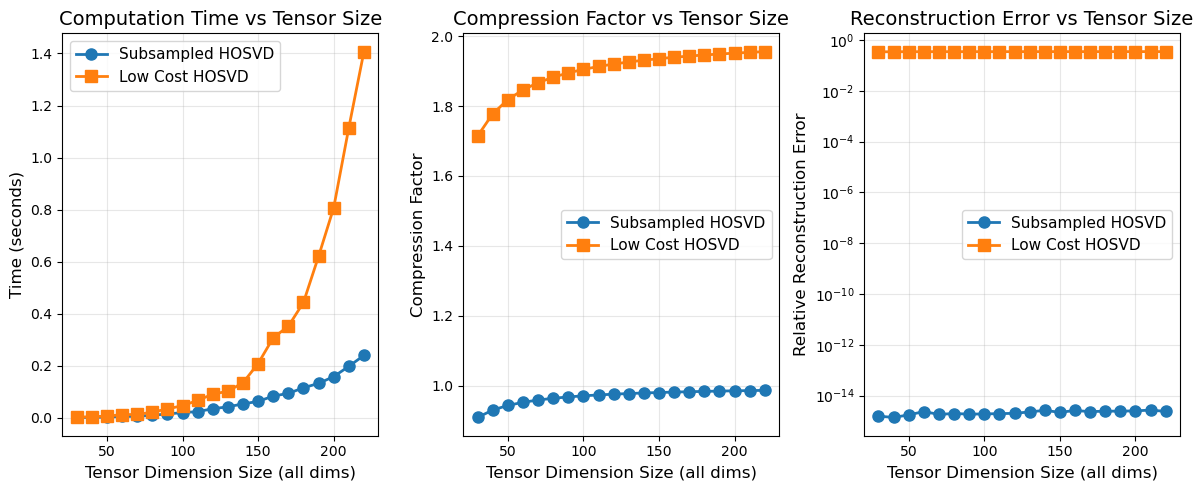


SUMMARY STATISTICS

Time Comparison:
  Average speedup (Subsampled/Low Cost): 0.34x
  Median speedup (Subsampled/Low Cost): 0.38x
  Min speedup: 0.17x
  Max speedup: 0.54x

Compression Factor Comparison:
  Subsampled HOSVD - Average: 0.97x, Min: 0.91x, Max: 0.99x
  Low Cost HOSVD - Average: 1.90x, Min: 1.71x, Max: 1.96x

Reconstruction Error Comparison:
  Subsampled HOSVD - Average: 2.15e-15, Min: 1.38e-15, Max: 2.69e-15
  Low Cost HOSVD - Average: 3.51e-01, Min: 3.45e-01, Max: 3.53e-01


In [92]:
import numpy as np
import matplotlib.pyplot as plt
import tensorly as tl
import time
from tensor_decompositions import (
    subsampled_hosvd, 
    low_cost_hosvd, 
    reconstruct_tensor, 
    compute_error,
    compute_compression_factor
)

base_size = 30
increment = 10
num_sizes = 20
sampling_ratio = 0.05

sizes = []
times_subsampled = []
times_low_cost = []
compression_factors_subsampled = []
compression_factors_low_cost = []
reconstruction_errors_subsampled = []
reconstruction_errors_low_cost = []

print("Running tensor size sweep...")
print("-" * 60)

for i in range(num_sizes):
    current_size = base_size + i * increment
    n1, n2, n3 = current_size, current_size, current_size
    sizes.append(current_size)
    
    test_tensor = np.random.rand(n1, n2, n3)
    
    print(f"\nSize: {n1}x{n2}x{n3} (Total elements: {n1*n2*n3:,})")
    
    core_sub, factors_sub, t_subsampled = subsampled_hosvd(test_tensor, sampling_ratio, time_it=True)
    times_subsampled.append(t_subsampled)
    compression_factor_sub = compute_compression_factor(test_tensor, core_sub, factors_sub)
    compression_factors_subsampled.append(compression_factor_sub)
    reconst_sub = reconstruct_tensor(core_sub, factors_sub)
    error_sub = compute_error(test_tensor, reconst_sub)
    reconstruction_errors_subsampled.append(error_sub)
    print(f"  Subsampled HOSVD: {t_subsampled:.4f}s, Compression: {compression_factor_sub:.2f}x, Error: {error_sub:.2e}")
    
    core_lc, factors_lc, t_lc = low_cost_hosvd(test_tensor, time_it=True)
    times_low_cost.append(t_lc)
    compression_factor_lc = compute_compression_factor(test_tensor, core_lc, factors_lc)
    compression_factors_low_cost.append(compression_factor_lc)
    reconst_lc = reconstruct_tensor(core_lc, factors_lc)
    error_lc = compute_error(test_tensor, reconst_lc)
    reconstruction_errors_low_cost.append(error_lc)
    print(f"  Low Cost HOSVD:   {t_lc:.4f}s, Compression: {compression_factor_lc:.2f}x, Error: {error_lc:.2e}")
    print(f"  Speedup (Sub/LC): {t_subsampled/t_lc:.2f}x")

print("\n" + "=" * 60)
print("Sweep complete!")

fig = plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.plot(sizes, times_subsampled, 'o-', label='Subsampled HOSVD', linewidth=2, markersize=8)
plt.plot(sizes, times_low_cost, 's-', label='Low Cost HOSVD', linewidth=2, markersize=8)
plt.xlabel('Tensor Dimension Size (all dims)', fontsize=12)
plt.ylabel('Time (seconds)', fontsize=12)
plt.title('Computation Time vs Tensor Size', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 2)
plt.plot(sizes, compression_factors_subsampled, 'o-', label='Subsampled HOSVD', linewidth=2, markersize=8)
plt.plot(sizes, compression_factors_low_cost, 's-', label='Low Cost HOSVD', linewidth=2, markersize=8)
plt.xlabel('Tensor Dimension Size (all dims)', fontsize=12)
plt.ylabel('Compression Factor', fontsize=12)
plt.title('Compression Factor vs Tensor Size', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.subplot(1, 3, 3)
plt.plot(sizes, reconstruction_errors_subsampled, 'o-', label='Subsampled HOSVD', linewidth=2, markersize=8)
plt.plot(sizes, reconstruction_errors_low_cost, 's-', label='Low Cost HOSVD', linewidth=2, markersize=8)
plt.xlabel('Tensor Dimension Size (all dims)', fontsize=12)
plt.ylabel('Relative Reconstruction Error', fontsize=12)
plt.title('Reconstruction Error vs Tensor Size', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.yscale('log')

plt.tight_layout()
plt.savefig('full_comparison_sweep.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "=" * 60)
print("SUMMARY STATISTICS")
print("=" * 60)
print(f"\nTime Comparison:")
print(f"  Average speedup (Subsampled/Low Cost): {np.mean(np.array(times_subsampled)/np.array(times_low_cost)):.2f}x")
print(f"  Median speedup (Subsampled/Low Cost): {np.median(np.array(times_subsampled)/np.array(times_low_cost)):.2f}x")
print(f"  Min speedup: {np.min(np.array(times_subsampled)/np.array(times_low_cost)):.2f}x")
print(f"  Max speedup: {np.max(np.array(times_subsampled)/np.array(times_low_cost)):.2f}x")

print(f"\nCompression Factor Comparison:")
print(f"  Subsampled HOSVD - Average: {np.mean(compression_factors_subsampled):.2f}x, Min: {np.min(compression_factors_subsampled):.2f}x, Max: {np.max(compression_factors_subsampled):.2f}x")
print(f"  Low Cost HOSVD - Average: {np.mean(compression_factors_low_cost):.2f}x, Min: {np.min(compression_factors_low_cost):.2f}x, Max: {np.max(compression_factors_low_cost):.2f}x")

print(f"\nReconstruction Error Comparison:")
print(f"  Subsampled HOSVD - Average: {np.mean(reconstruction_errors_subsampled):.2e}, Min: {np.min(reconstruction_errors_subsampled):.2e}, Max: {np.max(reconstruction_errors_subsampled):.2e}")
print(f"  Low Cost HOSVD - Average: {np.mean(reconstruction_errors_low_cost):.2e}, Min: {np.min(reconstruction_errors_low_cost):.2e}, Max: {np.max(reconstruction_errors_low_cost):.2e}")